# LAB A

We'll be using IPython and panads functionality in this part.

Our first goal is to get the information from the log files off of disk and into a dataframe.

Since we're working with limited resources we'll use samples of the larger files.


## Requirements

    IPython
    Pandas
    Matplotlib
    Seaborn
    datetime
    warnings
    
## Tip
To access keyboard shortcuts click on a (non-code) cell or the text "In []" to the left of the cell, and press the *H* key. Or select *Help* from the menu above, and then *Keyboard Shortcuts*. **Very useful saved us a lot of time during editing.

# Business Understanding

## Overview

The dataset that we've selected is from the field of Network Analysis and Security. We are using log files generated by BRO Network Security Monitor as our dataset. The dataset we've choosen has about 20 million records ( about  2 GB in size) and has 22 features with a number of sub-features explained in the feature description sections that follow.

We'll be analyzing the log file, finding the correlation between attack behavioud and the features to come up with probable conclusions and results that helped us in identifying malicious behavior and potential threats and attacks in the network of our dataset.

The plan is to understand the dataset, the features, attack behaviours, and their descriptions in-detail as they are stated by Bro.

We will do a lot of preprocessing including elimination, grouping, standardization, and imputation to try and make the dataset more convenient to work on.

After getting the dataset ready to be processed for extracting valuable statistical information, we then visualized those statistical information using the most appropriate plots (in our case, box plot was used extensively). Then we  grouped some of the features (use them to visualize relationships) and then use correlation matrix to represent all relationships between the different features that are important in our analysis (for example,the services and packets generated as well as received have a high corelation).

## Purpose

We selected this dataset because it is a complex as well as a technical dataset that is used on live data retaining value depending on its freshness. We are interested in learning more about security, its attacks, and their patterns.

The amount of real-time processing that can be done by analyzing the data collected can reduce a lot of manual work and catch patterns in attacks that occur over a large period of time that a human cannot identify.

These logs also allow us to see the amount of data being transferred and allowing organizations to allocate bandwidth depending based on the future scope of usage patterns.

## Importing Modules

In [6]:
import random
import pandas as pd
import requests
import numpy as np

### File sampling
We're working with a log file generated from <a href="http://www.bro.og/">Bro</a>

A Bro log is similar to netflow logs. The log file we're using is huge and doesn't fit in memory.

Therefore, we're setting the variable **sample_percent** to read in between 200k and 300k worth of (randomly selected) lines from the file.

In [7]:
logfile = './conn_sample.log'
sample_percent = .09
num_lines = sum(1 for line in open(logfile))
slines = set(sorted(random.sample(range(num_lines), int(num_lines * sample_percent))))
print (('%s lines in %s, using a sample of %s lines') %(num_lines, logfile, len(slines)))

22694 lines in ./conn_sample.log, using a sample of 2042 lines


### File Creation
Now we've a subset of lines to work with.

In the following cell we're writing these lines to a file that we'll be using for the majority of our work.

In [8]:
outfile = './out_sample'

w = open(outfile, 'w+')
r = open(logfile, 'r+')
linecount = 0
for line in r:
    if linecount in slines:
        w.write(line)
    linecount += 1
w.close()
r.close()

### File Input (CSV)
In the following cell we're using pandas to create a dataframe, and then it reading our newly created file conn_sample.log  into memory.

We're using the separator "\t" because Bro produces tab-delimited files by default.

We've also specified the columns labels in the dataframe.

Loading the data into the dataframe 'conn_df'.

We're naming the features using the default BRO feature names.

# Data Understanding

We're using a Log file named con.log that was created in BRO. Con.log is used for tracking/logging of general information regarding TCP, UDP, and ICMP traffic.

### Features Description

**ts - (time) Timestamp**

**uid - (string) Unique ID of Connection**

**id.orig_h - (addr) Originating endpoint's IP address**

**id.orig_p - (port) Originating endpoint's TCP/UDP port (or ICMP code)**

**id.resp_h - (addr) Responding endpoint's IP address**

**id.resp_p - (port) Responding endpoint's TCP/UDP port (or ICMP code)**

**proto - (transport_proto) Transport layer protocol of connection**

**service - (string) Dynamically detected application protocol**

**duration - (interval) Time of last packet seen till time of first packet seen**

**orig_bytes - (count) Originator payload bytes; from sequence numbers if TCP**

**resp_bytes - (count) Responder payload bytes; from sequence numbers if TCP**

**conn_state - (string) Connection state**

    S0 	    Connection attempt seen, no reply
    S1 	    Connection established, not terminated
    SF 	    Normal establishment and termination.
    REJ        Connection attempt rejected
    S2 	    Connection established and close attempt by originator seen
    S3 	    Connection established and close attempt by responder seen
    RSTO       Connection established, originator aborted (sent a RST)
    RSTR       Established, responder aborted
    RSTOS0     Originator sent a SYN followed by a RST, no SYN-ACK from the responder
    RSTRH      Responder sent a SYN ACK followed by a RST, no SYN from the originator
    SH 	    Originator sent a SYN followed by FIN, no SYN ACK from the responder 1/2 open
    SHR        Responder sent a SYN ACK followed by a FIN, no SYN from the originator
    OTH        No SYN seen, just midstream traffic “partial connection” not closed

**local_orig - (bool) If connection is local T; if connection is remote F**

**local_resp - (bool) If the connection is responded to locally, this value will be T. If it was responded to remotely it will be F.**

**missed_bytes - (count) Number of missing bytes in content gaps**

**history - (string) Connection state History, records the state history of connections as a string of letters. The meaning of those letters is:**
   
    
    s 	a SYN w/o the ACK bit set
    h 	a SYN+ACK (“handshake”)
    a 	a pure ACK
    d 	packet with payload (“data”)
    f 	packet with FIN bit set
    r 	packet with RST bit set
    c 	packet with a bad checksum
    i 	inconsistent packet (e.g. SYN+RST bits both set)

**orig_pkts - (count) Number of ORIG packets**

**orig_ip_bytes - (count) Number of ORIG IP bytes**

**resp_pkts - (count) Number of RESP packets**

**resp_ip_bytes - (count) Number of RESP IP bytes**

**tunnel_parents - (set) If tunneled, connection UID of encapsulating parent**

**threat - (string) **

**sample - (string) **


In [9]:
outfile = './conn_sample.log'
df = pd.read_csv(outfile, sep="\t", header=None, names=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','proto','service','duration','orig_bytes','resp_bytes','conn_state','local_orig','missed_bytes','history','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','tunnel_parents','threat','sample'])

### Verifying Input
Checking the contents of the file should be in a nicely laid-out dataframe.

We've experimented by calling the **head()** and **tail()** method to see the values at the beginning and end of the dataframe.

In [10]:
df.head()
#df.tail()
#df.head(100)
#df.tail(100)

ts                 uid        id.orig_h  id.orig_p  \
0  1.331901e+09  C6SwUo2lWDfrpgfgVl   192.168.202.79      50504   
1  1.331901e+09  C26Bhi2scZzizn7ph9   192.168.202.79      50681   
2  1.331901e+09   CnbU9V2P0WWwMlO1l   192.168.202.76      51719   
3  1.331901e+09   Cyu9CADFj5Kg5rhf4   192.168.202.79      48479   
4  1.331901e+09   CcUhD5kLSPzplLI5e  192.168.202.100      45658   

         id.resp_h  id.resp_p proto service  duration orig_bytes  ...  \
0  192.168.229.251         80   tcp    http  0.010000        182  ...   
1  192.168.229.251         80   tcp    http  0.010000        172  ...   
2  213.199.179.147         80   tcp       -  3.010000          0  ...   
3  192.168.229.153      49160   tcp       -  0.010000        198  ...   
4   192.168.27.152      17533   udp       -         -          -  ...   

  local_orig missed_bytes   history  orig_pkts orig_ip_bytes  resp_pkts  \
0          -            0   ShADfFa          4           398          3   
1          -            0  ShADdfFa          5           440          4   
2          -            0         S          2           104          0   
3          -            0  ShADdfFa          5           466          4   
4          -            0         D          1            28          0   

   resp_ip_bytes  tunnel_parents  threat sample  
0            382         (empty)     NaN    NaN  
1            501         (empty)     NaN    NaN  
2              0         (empty)     NaN    NaN  
3            334         (empty)     NaN    NaN  
4              0         (empty)     NaN    NaN  

[5 rows x 22 columns]

### Data Summarization

The **describe()** and **info** methods will give a summarization of all columns.

In [11]:
df.describe()

ts     id.orig_p     id.resp_p  missed_bytes      orig_pkts  \
count  2.269400e+04  22694.000000  22694.000000       22694.0   22694.000000   
mean   1.331949e+09  42753.924077  20598.650612           0.0      11.734511   
std    4.277650e+04  15289.541275  20788.309643           0.0    1563.859576   
min    1.331901e+09      3.000000      0.000000           0.0       0.000000   
25%    1.331908e+09  36057.750000   2133.000000           0.0       1.000000   
50%    1.331928e+09  44316.000000  10379.000000           0.0       1.000000   
75%    1.331997e+09  54534.500000  38230.500000           0.0       1.000000   
max    1.332018e+09  65491.000000  65535.000000           0.0  235588.000000   

       orig_ip_bytes      resp_pkts  resp_ip_bytes  threat  sample  
count   2.269400e+04   22694.000000   2.269400e+04     0.0     0.0  
mean    1.626597e+03      11.166476   1.865159e+03     NaN     NaN  
std     2.276985e+05    1558.312166   2.548142e+05     NaN     NaN  
min     0.000000e+00       0.000000   0.000000e+00     NaN     NaN  
25%     4.400000e+01       0.000000   0.000000e+00     NaN     NaN  
50%     4.800000e+01       1.000000   4.000000e+01     NaN     NaN  
75%     6.000000e+01       1.000000   4.000000e+01     NaN     NaN  
max     3.430141e+07  234752.000000   3.837745e+07     NaN     NaN

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22694 entries, 0 to 22693
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ts              22694 non-null  float64
 1   uid             22694 non-null  object 
 2   id.orig_h       22694 non-null  object 
 3   id.orig_p       22694 non-null  int64  
 4   id.resp_h       22694 non-null  object 
 5   id.resp_p       22694 non-null  int64  
 6   proto           22694 non-null  object 
 7   service         22694 non-null  object 
 8   duration        22694 non-null  object 
 9   orig_bytes      22694 non-null  object 
 10  resp_bytes      22694 non-null  object 
 11  conn_state      22694 non-null  object 
 12  local_orig      22694 non-null  object 
 13  missed_bytes    22694 non-null  int64  
 14  history         22694 non-null  object 
 15  orig_pkts       22694 non-null  int64  
 16  orig_ip_bytes   22694 non-null  int64  
 17  resp_pkts       22694 non-null 

### Data Types

Checking for the type of information Python stored in each column.

In [13]:
df.dtypes

ts                float64
uid                object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
proto              object
service            object
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
missed_bytes        int64
history            object
orig_pkts           int64
orig_ip_bytes       int64
resp_pkts           int64
resp_ip_bytes       int64
tunnel_parents     object
threat            float64
sample            float64
dtype: object

# Data Quality

From the previous cell outputs we can see that we've a lot of missing values.

    The ts feature is using an invalid datatype.
    orig_bytes and resp_bytes have invalid datatypes as object.
    Serice has a lot of missing values in the dataset.
    The columns Threat and Sample have a lot of NaN values.

## Imputing
Regarding the service feature, we tried imputing but the results were inaccurate. Imputing by using mode the solution that we get is invalid since services cannot be imputed since they are not dependent on each other. For example, nine HTTP service in no way relates to the 10th being an HTTP service. 

## Outliers
After thorough analysis we've seen significant outliers in the amount of packets being used (orig_bytes, orig_ip_bytes, resp_ip_bytes, and resp_bytes). This is due to the nature of traffic and relation between a service being used for file transfer or for connection authentication. For example, in the feature orig_ip_bytes the mean is around a 100bytes but the maximum goes to about 100 MB.

We'll be improving the dataquality in the cells that follow.

## Converting Feature Types
We're chaninging the ts (time stamp) feature to a datetime object using the function *to_datetime()*.

In [14]:
from datetime import datetime
df['ts'] = [datetime.fromtimestamp(float(date)) for date in df['ts'].values]

In [15]:
df.dtypes

ts                datetime64[ns]
uid                       object
id.orig_h                 object
id.orig_p                  int64
id.resp_h                 object
id.resp_p                  int64
proto                     object
service                   object
duration                  object
orig_bytes                object
resp_bytes                object
conn_state                object
local_orig                object
missed_bytes               int64
history                   object
orig_pkts                  int64
orig_ip_bytes              int64
resp_pkts                  int64
resp_ip_bytes              int64
tunnel_parents            object
threat                   float64
sample                   float64
dtype: object

##### Testing a small operation for fun
In the following code we're trying to find the percentage of TCP connections:

In [16]:
float(len(df[df.proto=='tcp']))/len(df.proto)*100.0

98.19335507182515

## Changing Data Types

Converting object datatype to numeric types

In [18]:
df.convert_dtypes().dtypes
# df.convert_objects(convert_numeric=True).dtypes

ts                datetime64[ns]
uid                       string
id.orig_h                 string
id.orig_p                  Int64
id.resp_h                 string
id.resp_p                  Int64
proto                     string
service                   string
duration                  string
orig_bytes                string
resp_bytes                string
conn_state                string
local_orig                string
missed_bytes               Int64
history                   string
orig_pkts                  Int64
orig_ip_bytes              Int64
resp_pkts                  Int64
resp_ip_bytes              Int64
tunnel_parents            string
threat                     Int64
sample                     Int64
dtype: object

Here, we can see that *orig_bytes* and *resp_bytes* have been changed to the type *float64*.

# Data Exploration

We'll start with the statistical summary of the data here.

We first remove some unnecessary features and NaN values. The features *ts*, *uid*, *id.orig_h*, *id.resp_h*, *threat* are removed without affecting our data's statistical integrity.

In [19]:
import numpy as np
df_without = df.drop(['threat','sample'], axis=1)
df.drop(df.columns[[0, 1, 2, 4, 11, 18, 19]], axis=1) 
df_without.describe(include=[np.number])

id.orig_p     id.resp_p  missed_bytes      orig_pkts  orig_ip_bytes  \
count  22694.000000  22694.000000       22694.0   22694.000000   2.269400e+04   
mean   42753.924077  20598.650612           0.0      11.734511   1.626597e+03   
std    15289.541275  20788.309643           0.0    1563.859576   2.276985e+05   
min        3.000000      0.000000           0.0       0.000000   0.000000e+00   
25%    36057.750000   2133.000000           0.0       1.000000   4.400000e+01   
50%    44316.000000  10379.000000           0.0       1.000000   4.800000e+01   
75%    54534.500000  38230.500000           0.0       1.000000   6.000000e+01   
max    65491.000000  65535.000000           0.0  235588.000000   3.430141e+07   

           resp_pkts  resp_ip_bytes  
count   22694.000000   2.269400e+04  
mean       11.166476   1.865159e+03  
std      1558.312166   2.548142e+05  
min         0.000000   0.000000e+00  
25%         0.000000   0.000000e+00  
50%         1.000000   4.000000e+01  
75%         1.000000   4.000000e+01  
max    234752.000000   3.837745e+07

---
#### Note
What is really worth mentioning here is the **dynamic range** of these attributes.
You can see that most of the features has a minimum value of zero, whereas the maximum value is significantly large. This is not an error, it is because of the sessions and the nature of the service requested. One might ask for an **http** page that will download a huge content, where another request might just be requesting for authentication or syn / ack packets ranging under 4KBs of data. 

We will see this dynamic range problem in further visualized plots.

---

In [20]:
df_without.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22694 entries, 0 to 22693
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ts              22694 non-null  datetime64[ns]
 1   uid             22694 non-null  object        
 2   id.orig_h       22694 non-null  object        
 3   id.orig_p       22694 non-null  int64         
 4   id.resp_h       22694 non-null  object        
 5   id.resp_p       22694 non-null  int64         
 6   proto           22694 non-null  object        
 7   service         22694 non-null  object        
 8   duration        22694 non-null  object        
 9   orig_bytes      22694 non-null  object        
 10  resp_bytes      22694 non-null  object        
 11  conn_state      22694 non-null  object        
 12  local_orig      22694 non-null  object        
 13  missed_bytes    22694 non-null  int64         
 14  history         22694 non-null  object        
 15  or

In addition to the preceding steps we're will provide more statistical information.

### Median

In [21]:
df.median()

/tmp/ipykernel_14899/530051474.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()
/tmp/ipykernel_14899/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


id.orig_p        44316.0
id.resp_p        10379.0
missed_bytes         0.0
orig_pkts            1.0
orig_ip_bytes       48.0
resp_pkts            1.0
resp_ip_bytes       40.0
threat               NaN
sample               NaN
dtype: float64

We can see that the median for the *orig_ip_bytes* and the *resp_ip_bytes* is too small compared to their max values.

The mean and the median of our numeric features are too small when comapred with the ORIG and RESP bytes.

When we see the maximum values they look like outliers that is due to the nature of our data or traffic that depends on the different type of connections and the services being used.

### Variance

In [22]:
df.var()

/tmp/ipykernel_14899/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


id.orig_p        2.337701e+08
id.resp_p        4.321538e+08
missed_bytes     0.000000e+00
orig_pkts        2.445657e+06
orig_ip_bytes    5.184663e+10
resp_pkts        2.428337e+06
resp_ip_bytes    6.493029e+10
threat                    NaN
sample                    NaN
dtype: float64

### Mode

We will show the mode for ORIG bytes, RESP bytes, and the entire dataframe.

In [23]:
print('The mode of the ORIG bytes :')
print(df.orig_ip_bytes.mode())
print('The mode of the RESP bytes:')
print(df.resp_ip_bytes.mode())
print('The mode of the the entire dataframe:')
print(df.mode())

The mode of the ORIG bytes :
0    60
dtype: int64
The mode of the RESP bytes:
0    40
dtype: int64
The mode of the the entire dataframe:
                           ts                 uid       id.orig_h  id.orig_p  \
0     2012-03-16 18:19:08.720  C00FhO1ar3vWdmCowb  192.168.204.45    63805.0   
1     2012-03-16 18:20:05.130  C00Iqd2Yr8fZLHCQ8b             NaN        NaN   
2     2012-03-16 18:23:19.540   C00a4YpJgnz3zO2O2             NaN        NaN   
3     2012-03-16 18:32:08.350  C00hzz4L8gewq6ohXd             NaN        NaN   
4     2012-03-16 19:03:48.340  C00oAn3ZQ0swymHFch             NaN        NaN   
...                       ...                 ...             ...        ...   
22689                     NaT   Czz9ToHuswoYGcXh1             NaN        NaN   
22690                     NaT  CzzLX53Bg8jItX5EA9             NaN        NaN   
22691                     NaT   CzzaybXGHvQJ7JbGe             NaN        NaN   
22692                     NaT   CzzlBP0MhMMeLABa5             N

We can conclude from the Mode that the local IP addresses are being used most, i.e, the local traffic is more.
The protocol TCP and port numbers 80 are being used the most and TCP uses port number 80.
*orig_ip_bytes* is 60, a SYN packet is of 60-bit in size.
*history* is Sr that means that the SYN packet is being sent the most.
*resp_ip_bytes* is 40, a FIN packet is of 40-bit in size.

These confirm that a SYN flood attack is targetting the network, which is one of the most common form of a DDoS attack.

*SYN flood is a form of denial-of-service attack in which an attacker sends a succession of SYN requests to a target's system in an attempt to consume enough server resources to make the system unresponsive to legitimate traffic.*

## Range

Now let's find the Range of the ORIG and RESP IP bytes.

This will give us an indication of the amount of bandwidth is being used. This can be used to estimate the amount of bandwidth that we may need in the future or may be needed in case of a DDoS attack to maintain availability. 

We can solve the *Dynamic Range problem* by subtracting the mean and dividing it by the standard deviation, as done in the following cells.


In [24]:
print('The Range of the ORIG IP bytes is: ')
origin_range = df.orig_ip_bytes.max() - df.orig_ip_bytes.min()
print(origin_range)
print('Mean is: ', df.orig_ip_bytes.mean())
print('Max is: ', df.orig_ip_bytes.max())
print('Minimum is: ', df.orig_ip_bytes.min())
print('-------------')
print('The Range of the RESP IP bytes is: ' )
resp_range = df.resp_ip_bytes.max() - df.resp_ip_bytes.min()
print(resp_range)
print('Mean is: ', df.resp_ip_bytes.mean())
print('Max is: ', df.resp_ip_bytes.max())
print('Min is: ', df.resp_ip_bytes.min())

The Range of the ORIG IP bytes is: 
34301410
Mean is:  1626.5974266325902
Max is:  34301410
Minimum is:  0
-------------
The Range of the RESP IP bytes is: 
38377452
Mean is:  1865.1585000440646
Max is:  38377452
Min is:  0


## Grouping and Features Manipulation

We will group and create a dataframe grouped using features.

Grouping by protocol *proto* shows that 98% of the connections are using TCP: 

In [25]:
df_grouped = df.groupby(by='proto')
print(df_grouped.service.count())
print('---------------------------------------')
#print('---------------------------------------')
#print(df_grouped.service.sum() / df_grouped.service.count())
df_grouped_diff=df.groupby(by='service')
print(df_grouped_diff.service.count())

proto
icmp      181
tcp     22284
udp       229
Name: service, dtype: int64
---------------------------------------
service
-       22037
dhcp        3
dns       168
ftp         4
http      423
smtp        1
ssh         2
ssl        56
Name: service, dtype: int64


Now we are looking at a summary of df with the http service. 

In [26]:
df[df['service'] == 'http'].describe()

id.orig_p    id.resp_p  missed_bytes   orig_pkts  orig_ip_bytes  \
count    423.000000   423.000000         423.0  423.000000     423.000000   
mean   32367.212766   977.877069           0.0   13.356974    2082.910165   
std    22693.391088  2282.169384           0.0   34.227393    6910.418807   
min     1107.000000    80.000000           0.0    4.000000     227.000000   
25%     4043.500000    80.000000           0.0    5.000000     583.500000   
50%    41147.000000    80.000000           0.0    6.000000     664.000000   
75%    51452.500000    80.000000           0.0    8.000000     840.000000   
max    65430.000000  8080.000000           0.0  205.000000   40524.000000   

        resp_pkts  resp_ip_bytes  threat  sample  
count  423.000000     423.000000     0.0     0.0  
mean    10.302600    5540.092199     NaN     NaN  
std     21.388157   15220.842252     NaN     NaN  
min      2.000000     112.000000     NaN     NaN  
25%      4.000000     700.500000     NaN     NaN  
50%      5.000000    1878.000000     NaN     NaN  
75%      9.000000    8505.000000     NaN     NaN  
max    192.000000  265204.000000     NaN     NaN

From the above table we can see that the traffic from http *resp_ip_bytes* is a lot more than *orig_ip_bytes*. This confirms  an HTTP Flood attack.

*HTTP flood is a type of Distributed Denial of Service (DDoS) attack in which the attacker exploits seemingly-legitimate HTTP GET or POST requests to attack a web server or application.*

*HTTP flood attacks are volumetric attacks, often using a botnet “zombie army”—a group of Internet-connected computers, each of which has been maliciously taken over, usually with the assistance of malware like Trojan Horses.*

# Visualization

##### Box plot
Hunting for some meaningful information. Plotting to have a rough idea about the size of most of the ORIG bytes. 

<AxesSubplot: >

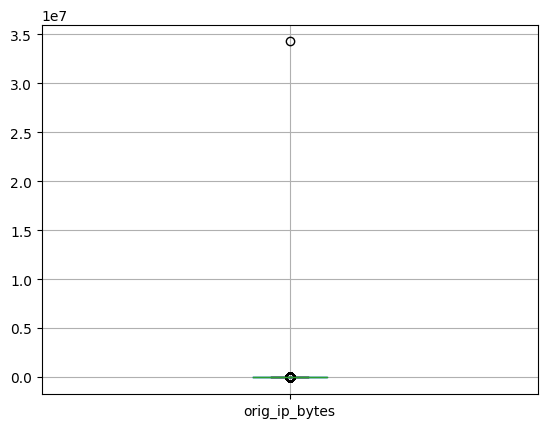

In [27]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
ax = df.boxplot(column='orig_ip_bytes')
ax

### Slicing the Data
The dynamic range of *orig_ip_bytes* is huge so we run this on a slice of data.

Checking the IP bytes less than 1500 

<AxesSubplot: >

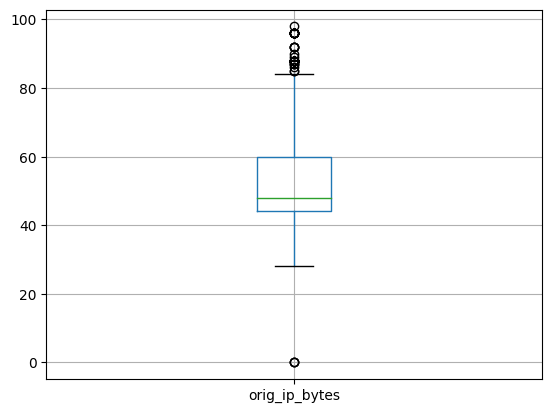

In [28]:
df[df.orig_ip_bytes < 100].boxplot(column='orig_ip_bytes')

We can see that most of the ORIG bytes lie withing 40 - 60 bytes confirming that most of the packets are service initiation packets, in a regular scenario this should not've been the case.


Now we use the same box plot on **resp_ip_bytes** feature.

<AxesSubplot: >

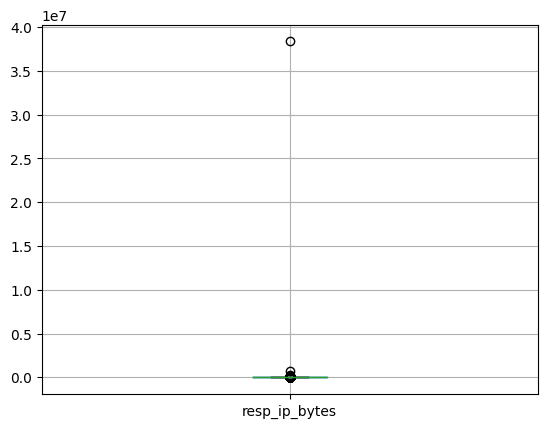

In [29]:
ay = df.boxplot(column='resp_ip_bytes')
ay

The packet size is smaller with a few outliers showing actual traffic. This demonstrates that flood attacks are leading the replying / response systems to repsond to every ORIG packet.

<AxesSubplot: >

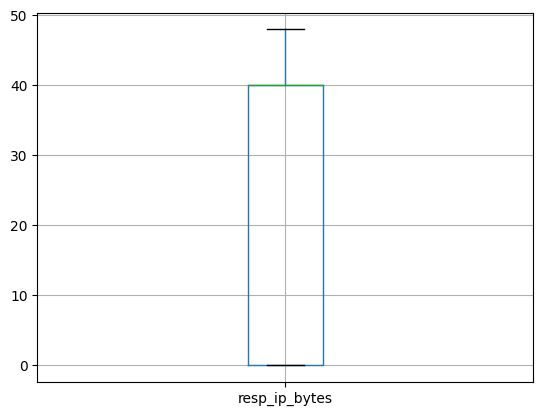

In [30]:
df[df.resp_ip_bytes < 50].boxplot(column='resp_ip_bytes')

### Normalization and Standardization

Looking at the dynamic range of the preceding figures Normalization of the data frame
is expected.

In the following cell we will normalize the ORIG bytes and the RESP bytes in the box plot.


In [31]:
orig_norm = (df.orig_ip_bytes-df.orig_ip_bytes.mean())/(df.orig_ip_bytes.std())
resp_norm = (df.resp_ip_bytes-df.resp_ip_bytes.mean())/(df.resp_ip_bytes.std())
print('The normalized values of the originated bytes and the response bytes are:')
print('Originated Bytes:')
print(orig_norm.min(), orig_norm.max(), orig_norm.mean())
print('----------------------------------------------')
print('Response Bytes:')
print(resp_norm.min(), resp_norm.max(), resp_norm.mean())

The normalized values of the originated bytes and the response bytes are:
Originated Bytes:
-0.007143644322842555 150.63681336677044 -6.26194356006081e-19
----------------------------------------------
Response Bytes:
-0.007319679580029734 150.6022138969684 1.252388712012162e-18


Even after normalization the dynamic range is **extremely high**.

The maximum is around 1000 whereas the minimum is around 0.004 for RESP bytes and 0.01 for ORIG bytes.

The reason for this is that during the peak usage we see surge in the traffic that spreads out our data's dynamic range even more.

These peak usage are potential buffer overflow threats.

Thus we decided to used the data without normalization and ignoring the outliers.

---

# Grouping and Visualization

Grouping by service is a very useful and informative way of visualizing relationships and statistical information between differrent attributes.

The following plot gives us a decent enough idea about our data.

#for example: the responded http ip packets (resp_ip_bytes) are mostly less than 5 MBytes ..
#same way we can get a rough idea about the other features 

/home/sarah/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='orig_ip_bytes', ylabel='resp_ip_bytes'>

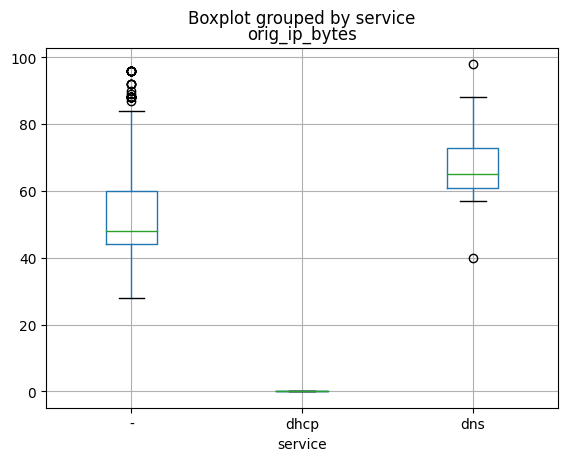

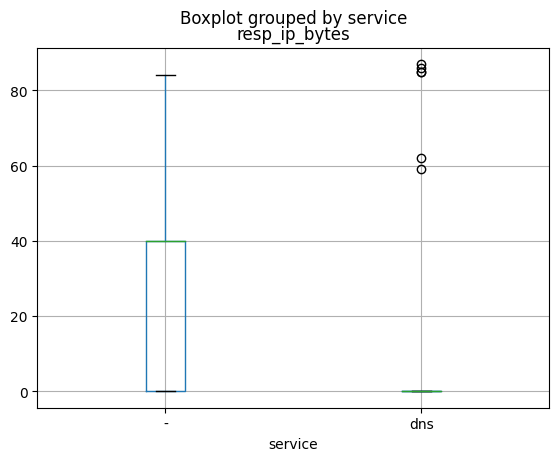

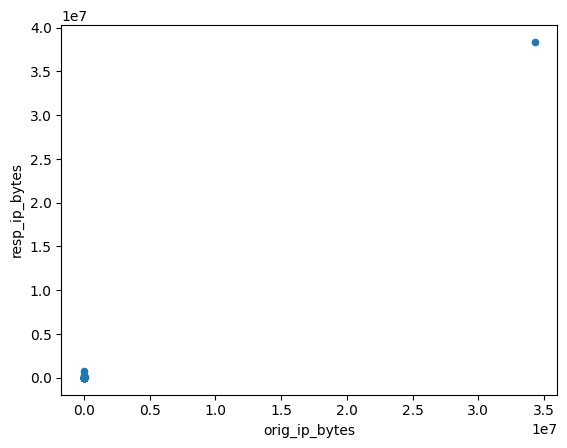

In [35]:
df[df.orig_ip_bytes < 100].boxplot(column='orig_ip_bytes', by='service')
df[df.resp_ip_bytes < 100].boxplot(column='resp_ip_bytes', by='service')
from pandas.plotting import scatter_matrix
df.plot(kind='scatter', x='orig_ip_bytes', y='resp_ip_bytes')


The preceding box plots shows that huge amount of packets being sent under unidentified services (probably applications specific protocols) and the large number of packets being send via DNS shows *DNS Flooding* is taking place.

The scatter plot is showing a *reationship between RESP bytes and ORIG bytes* that was invisible earlier using box plots. When the overflow packets are being send that are larger in size the *buffer overflow* on the receiver's side does not allow the receiver to send a response confirming a *Ping of Death* attack. *SYN Flood* occuring when the size of ORIG and RESP packets is small and large in count.

#### Box Plot for Port numbers and Services

This plot will try to visualize and relate the ORIG port numbers and the RESP port numbers.

Another useful grouping has been done here by relating the service with the RESP and ORIG port numbers. This is being used to visualize the range of port numbers over which the services are being run on.

The  port numbers are standardized for certain services.

The box plots are giving a spread over which the port numbers are being used and the mediam is the most common port number being used by the respective service. 

In the following plots the outliers can be potential threats. 

<AxesSubplot: title={'center': 'id.orig_p'}, xlabel='service'>

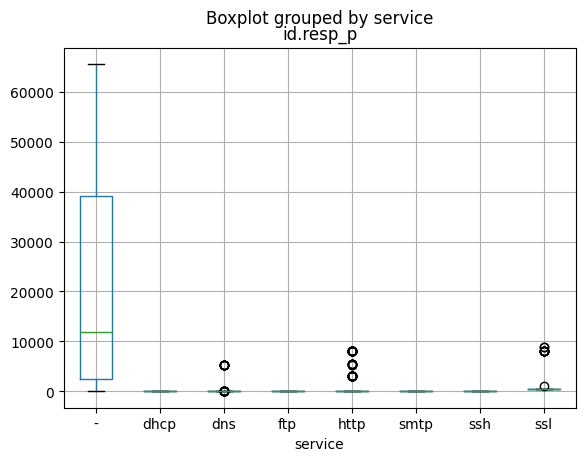

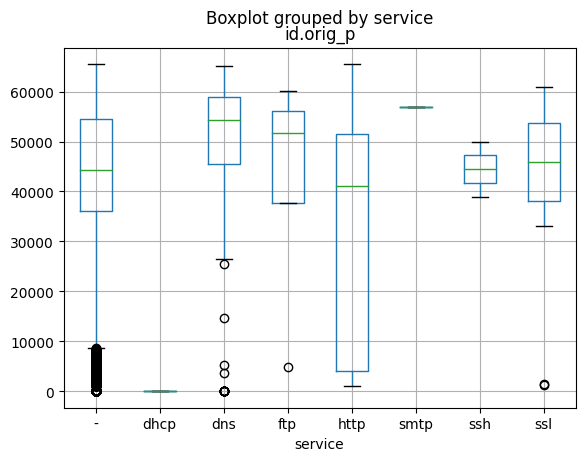

In [36]:
df.boxplot(column='id.resp_p', by='service')
df.boxplot(column='id.orig_p', by='service')

#### Working with the Scatter plot to find a relationship between RESP port and RESP bytes 

/home/sarah/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='resp_ip_bytes', ylabel='id.resp_p'>

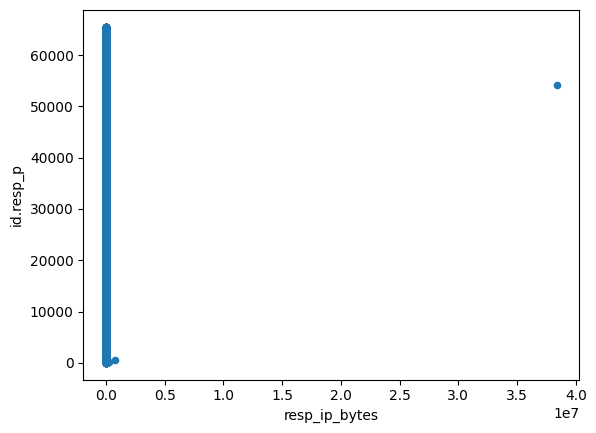

In [38]:
from pandas.plotting import scatter_matrix
df.plot(kind='scatter',x='resp_ip_bytes', y='id.resp_p')

Here we can see that the response packets don't change much. 
The *probable attacks* can be seen in the **RESP bytes > 100MB** area that are below the port number 10000 as these are the most commonly used ports and do not transfer packets that huge.

The spread between higher packet sizes between the port range from **50000 - 65500** shows a trend in **P2P or uTP (Torrent) traffic** that has a high data usage.

##### Using Seaborn for a clearer understanding of the relationship between ORIG IP bytes, ORIG port number, RESP IP Bytes, and RESP Port numbers.

/home/sarah/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


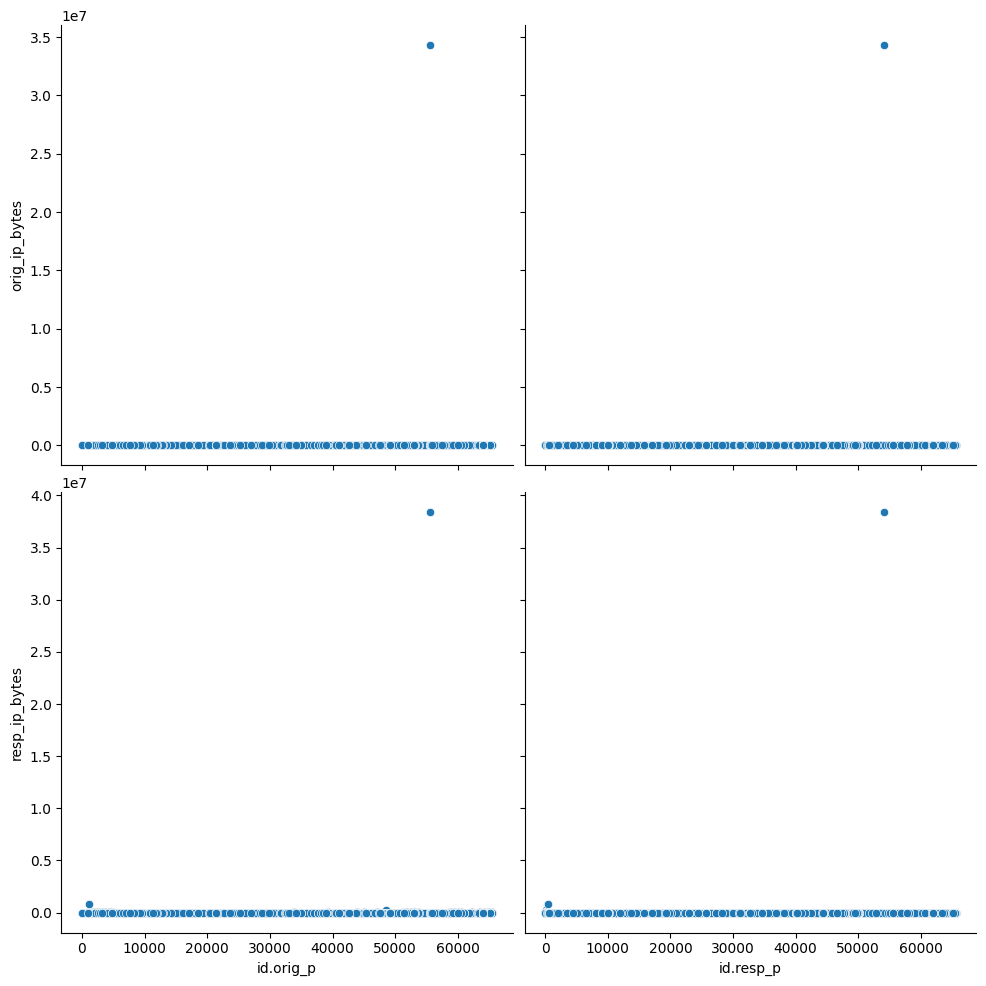

In [39]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
g = sns.pairplot(df, size=5,
           x_vars=["id.orig_p", "id.resp_p"],
               y_vars=["orig_ip_bytes", "resp_ip_bytes"])

This scatter plots is an easy way to understand the traffic patters that we can see in the ⟨host,port⟩ pairs. It also shows the relationship between the ORIG Bytes and RESP Bytes varying with port numbers.

### Plotting Relations using Correlation Matrix

The number of features we used is large. The services show a huge correlation between the ORIG and RESP bytes as well as Port numbers.

In order to summarize this large correlation of features and services we are using seaborn correlation matrix.

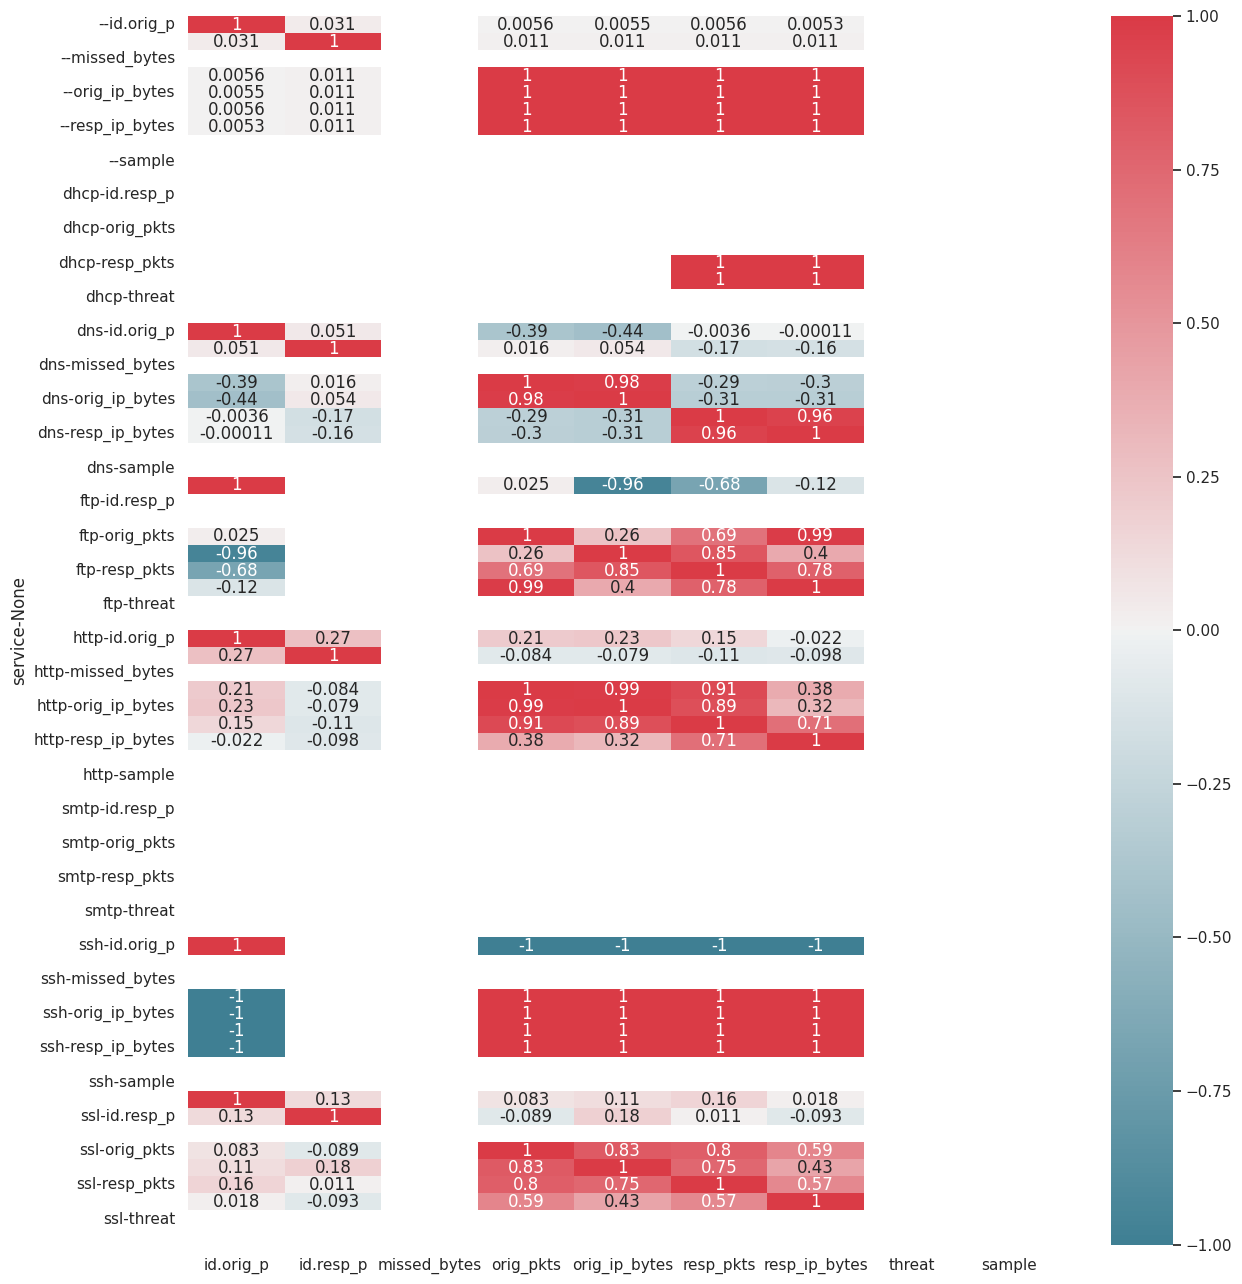

In [40]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 13))

sns.heatmap(df_grouped_diff.corr(), cmap=cmap, annot=True)

f.tight_layout()

From this visualization we can see the high correlation between all the fields with numbers close to 1. It summarizes the behaviour of the traffic that was recorded in our dataset.

This plot reduces the number of plots / figures that show the relationship between the features.

# Extra Feature Infomation

If we have access to other log files, also generated by BRO,  we can triangulate the correlation in attacks from all of the files realtime. The log files can be:

**http log** (contains features representing HTTP traffic thta represents majority of our traffic data) 

**host_detections log** (HOST - PORT pair data that gave us multiple probabilities of attacks can be confirmed using the features from the host_detections log file) 

**malicious domains log** (this file contains a list and behavioud of all the malicous domains relating to which we can confirm the attacks) 

**originating IP bytes log** (recorded by BRO at the same time and has addition IP features) 

**honey pot log ** (most common exploits and honeypots database taht records their behaviour)

# Additional Analysis

Here we will use column indexing and compare the port number with the service to indicate if there is an attack or a potential threat.
Using Port numbers and service is a very potent way of identifying potential threats.
We know the standard port number for services. For example: http uses 80 , ssl uses 443 , and so on. We will use this to our advantage to scan for abnormal port usage patterns.

#### First, we can use the service column to check the SSL only connections and their properties:

In [41]:
df[df['service'] == 'ssl'].head()

ts                 uid        id.orig_h  id.orig_p  \
593  2012-03-16 17:47:39.000   CEOWUU2TjmC9q7u23   192.168.202.79      52559   
626  2012-03-16 17:48:54.450   CtMo4rYJj03VXP6f9   192.168.202.79      54502   
681  2012-03-16 17:50:21.540  Cw5NZa4LBCIXvkJP3l   192.168.202.79      56780   
3163 2012-03-16 18:22:02.000  Cucznu2HsgyC4t4pWc  192.168.202.110      34101   
3491 2012-03-16 18:23:36.540  CtWYn84MSu8z3YDpxd  192.168.202.110      45970   

            id.resp_h  id.resp_p proto service  duration orig_bytes  ...  \
593   192.168.229.254        443   tcp     ssl  0.260000        557  ...   
626   192.168.229.254        443   tcp     ssl  0.260000        534  ...   
681   192.168.229.254        443   tcp     ssl  0.010000        538  ...   
3163   192.168.27.253        443   tcp     ssl  0.140000        633  ...   
3491   192.168.27.253        443   tcp     ssl  0.100000        633  ...   

     local_orig missed_bytes    history  orig_pkts orig_ip_bytes  resp_pkts  \
593           -            0  ShADadfFr         15          1345         13   
626           -            0  ShADadfrF         15          1322         13   
681           -            0  ShADadfFr          8           962         13   
3163          -            0   ShADadfR          9          1109          7   
3491          -            0   ShADadfR          9          1109          7   

      resp_ip_bytes  tunnel_parents  threat sample  
593            1744         (empty)     NaN    NaN  
626            1744         (empty)     NaN    NaN  
681            1744         (empty)     NaN    NaN  
3163           2516         (empty)     NaN    NaN  
3491           2516         (empty)     NaN    NaN  

[5 rows x 22 columns]

This df shows all the features with an SSL connection.

SSL is a security protcol and a connection using SSL on a port other than 443 is considered as a potential attack:

In [42]:
ssldf = df[df['service'] == 'ssl']
ssldf[ssldf['id.resp_p'] != 443] 

ts                 uid        id.orig_h  \
4236  2012-03-16 18:35:14.250000   Cj8fxT6xx6PYIxTs4  192.168.202.110   
9684  2012-03-16 23:21:13.520000  Cf9Eg53AMuMgX7rPNj   192.168.204.45   
9927  2012-03-16 23:26:11.510000  Caw3RZ22qiY26Pedll   192.168.204.45   
10820 2012-03-17 00:39:30.980000  CPeFOA2DMxyMjYlv2g    192.168.202.4   
17409 2012-03-17 20:44:14.950000   CZ5WMyg0wXhB6Mev9  192.168.202.140   
17646 2012-03-17 20:48:18.160000  C1nEpC47jKfqwDPT2c  192.168.202.140   
17648 2012-03-17 20:48:18.760000  Ctf8Oo4kbhkZKsgyRb  192.168.202.140   
17691 2012-03-17 20:48:40.120000  Co9Rdg1ZksVFWMCtql  192.168.202.140   
18154 2012-03-17 20:53:27.859999   C5M5cxQRTkVO4Q9n9  192.168.202.140   
18165 2012-03-17 20:53:59.130000  CYnB8I34p843FHKp1g  192.168.202.140   
18197 2012-03-17 20:54:52.380000  Cu6qGT2Whb82EIeyAj  192.168.202.140   
20828 2012-03-17 23:19:07.070000  CClUID3xU0ohX5rmHf  192.168.202.138   

       id.orig_p        id.resp_h  id.resp_p proto service  duration  \
4236       52062   192.168.27.253       8089   tcp     ssl  0.170000   
9684       38563  192.168.202.110       8834   tcp     ssl  0.170000   
9927       38616  192.168.202.110       8834   tcp     ssl  0.240000   
10820      35996   192.168.26.152       8089   tcp     ssl  5.000000   
17409      36152   192.168.21.102        993   tcp     ssl  0.020000   
17646      57590   192.168.21.253       8089   tcp     ssl  0.010000   
17648      57636   192.168.21.253       8089   tcp     ssl  0.020000   
17691      59343   192.168.21.253       8089   tcp     ssl  0.020000   
18154      40989   192.168.25.253       8089   tcp     ssl  0.090001   
18165      49032   192.168.24.253       8089   tcp     ssl  0.010000   
18197      53294   192.168.25.253       8089   tcp     ssl  0.010000   
20828      44907   192.168.21.253       8089   tcp     ssl         -   

      orig_bytes  ... local_orig missed_bytes    history  orig_pkts  \
4236         697  ...          -            0   ShADadfR          9   
9684        1004  ...          -            0  ShADadfFr         18   
9927        1122  ...          -            0  ShADadfFr         16   
10820        457  ...          -            0  ShADdaFfR         10   
17409         50  ...          -            0    ShADadR          5   
17646        657  ...          -            0   ShADadfR          7   
17648        657  ...          -            0   ShADadfR          7   
17691        721  ...          -            0   ShADadfR          7   
18154        649  ...          -            0   ShADadfR          8   
18165        721  ...          -            0   ShADadfR          7   
18197        697  ...          -            0   ShADadfR          7   
20828          -  ...          -            0    ShADadR          5   

      orig_ip_bytes  resp_pkts  resp_ip_bytes  tunnel_parents  threat sample  
4236           1173          6           2136         (empty)     NaN    NaN  
9684           2960         20           5466         (empty)     NaN    NaN  
9927           3092         18           6176         (empty)     NaN    NaN  
10820           961          7            515         (empty)     NaN    NaN  
17409           318          3           1405         (empty)     NaN    NaN  
17646          1029          6           2005         (empty)     NaN    NaN  
17648          1029          6           2005         (empty)     NaN    NaN  
17691          1093          6           2005         (empty)     NaN    NaN  
18154          1073          6           2120         (empty)     NaN    NaN  
18165          1093          6           2005         (empty)     NaN    NaN  
18197          1069          6           2136         (empty)     NaN    NaN  
20828           298          3            754         (empty)     NaN    NaN  

[12 rows x 22 columns]

As we can see, we have about 526 probable attacks using the SSL protocol.

#### http Attacks

HTTP uses port 80 by default. Using the same method, we can identify potential HTTP attacks.
By looking at just the http service we get:

In [43]:
httpdf = df[df['service'] == 'http']
httpdf[httpdf['id.resp_p'] != 80]

ts                 uid        id.orig_h  id.orig_p  \
596   2012-03-16 17:47:54.090    CaJAmmP5v29z835h   192.168.202.79      40980   
2925  2012-03-16 18:20:10.780   CCD0E6RaWaKg9axL1  192.168.202.110      39469   
2951  2012-03-16 18:20:23.810  C7AAwB2l6isG3jvsNk  192.168.202.110      40576   
2968  2012-03-16 18:20:48.250  CTViLI12AzvlNwx8O6  192.168.202.110      41879   
3051  2012-03-16 18:21:30.070  CazJv31L7021D6jqad  192.168.202.110      45345   
...                       ...                 ...              ...        ...   
20765 2012-03-17 23:17:05.910  CToDpd4Vdk0Bwnjbqd  192.168.202.138      48966   
20767 2012-03-17 23:17:09.310  CbYR3d1SdcKsWSRqi4  192.168.202.138      49745   
20889 2012-03-17 23:20:30.370  CseEs62cUPjoznQROh  192.168.202.138      58950   
22061 2012-03-18 00:06:30.480  Cr7vL310sXDOp5aQe9  192.168.202.112      57844   
22089 2012-03-18 00:14:00.640  C41vPG3PedRwC2MuWb   192.168.202.68      46896   

             id.resp_h  id.resp_p proto service  duration orig_bytes  ...  \
596    192.168.229.153       5357   tcp    http  0.260000        164  ...   
2925    192.168.27.102       3128   tcp    http         -          -  ...   
2951    192.168.27.102       3128   tcp    http         -          -  ...   
2968    192.168.27.102       3128   tcp    http  0.080000        378  ...   
3051    192.168.27.102       3128   tcp    http  0.460000        310  ...   
...                ...        ...   ...     ...       ...        ...  ...   
20765   192.168.21.102       3128   tcp    http  0.010000        359  ...   
20767   192.168.21.102       3128   tcp    http  0.010000        329  ...   
20889   192.168.21.253       8000   tcp    http  0.010000        298  ...   
22061   192.168.27.102       3128   tcp    http  0.010000        319  ...   
22089   192.168.27.102       3128   tcp    http  0.110000        764  ...   

      local_orig missed_bytes    history  orig_pkts orig_ip_bytes  resp_pkts  \
596            -            0    ShADfFa          5           432          3   
2925           -            0   ShADadfR          7           667          6   
2951           -            0   ShADadfR          7           669          6   
2968           -            0   ShADadfR          8           802          6   
3051           -            0   ShADadfR          8           734          6   
...          ...          ...        ...        ...           ...        ...   
20765          -            0   ShADadfR          7           731          6   
20767          -            0   ShADadfR          5           597          4   
20889          -            0    ShADadR          6           618          4   
22061          -            0   ShADadFf          8           743          7   
22089          -            0  ShADFadfR          8          1140          7   

       resp_ip_bytes  tunnel_parents  threat sample  
596              351         (empty)     NaN    NaN  
2925            3839         (empty)     NaN    NaN  
2951            3843         (empty)     NaN    NaN  
2968            3987         (empty)     NaN    NaN  
3051            3825         (empty)     NaN    NaN  
...              ...             ...     ...    ...  
20765           3953         (empty)     NaN    NaN  
20767            574         (empty)     NaN    NaN  
20889            649         (empty)     NaN    NaN  
22061           3913         (empty)     NaN    NaN  
22089           3934         (empty)     NaN    NaN  

[66 rows x 22 columns]

Filtering all the connections on ports other than 80 we can see 5849 records that are potential threats because they used an http service not used port 80.

To check for abnormality in the amount of bytes being sent / received we calculate the mean of RESP bytes of the potentially attacked ssl service:

In [44]:
ssldf['resp_ip_bytes'].mean()

3185.714285714286

The mean of the RESP bytes for the HTTP service is:

In [45]:
httpdf['resp_ip_bytes'].mean()

5540.09219858156

SSL bytes size is more than normal, confirming malicious behaviour.

-----